# Pandas, explorando datasets y pintando gráficas

[*pandas*](http://pandas.pydata.org/) es un conjunto de estructuras de datos basada en columnas optimizada para el Aprendizaje Computacional. De hecho, muchos frameworks de ML permiten recibir las estructuras de datos *pandas* como entradas.
Para obtener información adicional, [la documentación de *pandas*](http://pandas.pydata.org/pandas-docs/stable/index.html).

## Conceptos básicos

Lo primero, importar la librería:

In [ ]:
import pandas as pd

Hay dos estructuras de datos principales en *pandas*:

  * **`DataFrame`**, algo así como una tabla relacional de datos, con filas y columnas con nombre.
  * **`Series`**, que representa una sucesión de valores, o lo que es lo mismo, una única columna.


Un ejemplo de creación de una serie de datos, en este caso ciudades:

In [ ]:
pd.Series(['Madrid', 'Málaga', 'Barcelona'])

0       Madrid
1       Málaga
2    Barcelona
dtype: object

Los `DataFrame` se pueden crear pasando como parámetro un `dict` de Python vinculando el nombre de cada columna como un `string` con su correspondiente `Series`. Si los tamaños de las `Series` no coinciden, se rellenan los huecos con unos valores especiales soportados por esta librería para representar la ausencia de datos [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Por ejemplo:

In [ ]:
ciudades = pd.Series(['Madrid', 'Málaga', 'Barcelona'])
poblacion = pd.Series([852469, 1015785, 485199])

ciudades_y_poblacion = pd.DataFrame({ 'Nombre': ciudades, 'Poblacion': poblacion })
ciudades_y_poblacion

,Nombre,Poblacion
0,Madrid,852469
1,Málaga,1015785
2,Barcelona,485199


También es posible cargar un fichero completo en un `DataFrame`:

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


Una utilidad interesante para un primer vistazo al conjunto de datos es la función `describe`:

In [ ]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Tambiéén se puede echar un vistazo a las primeras observaciones mediante la función `head` aplicada sobre un Dataframe:

In [ ]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Otra característica interesante de *pandas* son las gráficas rápidas:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd81328fdd8>]],
      dtype=object)

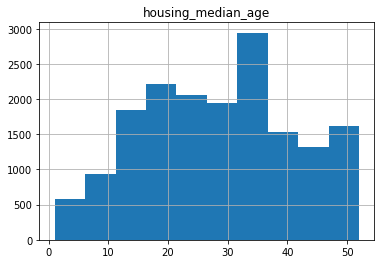

In [ ]:
california_housing_dataframe.hist('housing_median_age')

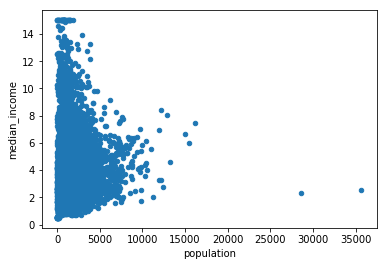

In [ ]:
california_housing_dataframe.plot.scatter('population','median_income')

## Accediendo a los datos


In [ ]:
ciudades_y_poblacion
print(type(ciudades_y_poblacion['Nombre']))
ciudades_y_poblacion['Nombre']

<class 'pandas.core.series.Series'>


0       Madrid
1       Málaga
2    Barcelona
Name: Nombre, dtype: object

In [ ]:
print(type(ciudades_y_poblacion['Nombre'][1]))
ciudades_y_poblacion['Nombre'][1]

<class 'str'>


'Málaga'

In [ ]:
print(type(ciudades_y_poblacion[0:2]))
ciudades_y_poblacion[0:2]

<class 'pandas.core.frame.DataFrame'>


,Nombre,Poblacion
0,Madrid,852469
1,Málaga,1015785


Hay otros mecanismos más avanzados para [seleccionar y extraer](http://pandas.pydata.org/pandas-docs/stable/indexing.html) datos de un Dataframe:

In [ ]:
c = ciudades_y_poblacion.copy()
c.iloc[:2,1]

0     852469
1    1015785
Name: Poblacion, dtype: int64

## Manipulando los datos

Otra de las principales ventajas es que se pueden aplicar operaciones y funciones de transformación a nivel de columna. Por ejemplo, podemos reducir la población de las ciudades a la magnitud 'miles de personas':

In [ ]:
poblacion / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

O aplicar funciones de la librería que ya conocemos, NumPy:

In [ ]:
import numpy as np

np.log(poblacion)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

También es posible aplicar funciones a los valores de una columna con 
`Series.apply`, que es similar a un `map`. Este operador acepta una [función lambda](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), la cual será aplicada a cada valor de la columna.

In [ ]:
poblacion.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


De la misma forma es posible modificar los valores de un Dataframe, e incluso añadir nuevas columnas que se calculan en base al resto:

In [ ]:
c['Area'] = pd.Series([46.87, 176.53, 97.92])
c['Densidad'] = c['Poblacion'] / c['Area']
c

,Nombre,Poblacion,Area,Densidad
0,Madrid,852469,46.87,18187.945381
1,Málaga,1015785,176.53,5754.177760
2,Barcelona,485199,97.92,4955.055147


## Índices
Tanto las `Series` como los `DataFrame` tienen definidos una propiedad `indice` que asigna un laor identificador a cada item de la `Series` o fila del  `DataFrame`. 

Por defecto, al crear un objeto de pandas se crea un índice numérico que representa el orden en el que se han agregado los datos.

In [ ]:
c.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
california_housing_dataframe.index

RangeIndex(start=0, stop=17000, step=1)

Cambiar el índice de un Dataframe es una herramienta muy útil para aplicarle aleatoriedad al mismo. Podemos utilizar la función para cambiar los índices de un Dataframe combinado con la función de Numpy que devuelve una permutación para 'aleatorizar' el Dataframe:

In [ ]:
c.reindex(np.random.permutation(c.index))

,Nombre,Poblacion,Area,Densidad
2,Barcelona,485199,97.92,4955.055147
0,Madrid,852469,46.87,18187.945381
1,Málaga,1015785,176.53,5754.177760


## La librería Matplotlib

Esta librería es de las más utilizadas a la hora de representar gráficamente la información. En su [documentación](https://matplotlib.org/3.1.1/users/index.html) se puede encontrar toda la información relevante sobre el modo de uso de la librería, así como algunos tutoriales.

Un ejemplo básico de funcionamiento de Matplotlib es usar el módulo `Pyplot`:

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('algunos números')
plt.show()

En el caso anterior, solo hemos proporcionado un conjunto de valores, por lo que por defecto esos valores se comportan como los valores de los puntos en el eje `Y`. `Pyplot` crea valores para el eje `X` automáticamente, en este caso crea un rango entre 0 y el número de elementos que hemos pasado como valores de `Y`.

No obstante, puede ser interesante proporcional explícitamente los valores de ambos ejes. Esto es posible:

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('valores de Y')
plt.xlabel('valores de X')
plt.show()

Por cada par de argumentos x, y, hay un tercer argumento opcional que es la cadena de formato que indica el color y el tipo de línea del gráfico. Las letras y símbolos de la cadena de formato estilo MATLAB, y se concatena una cadena de color con una cadena de estilo de línea. La cadena de formato por defecto es 'b-', que es una línea azul sólida. Por ejemplo, para trazar lo anterior con círculos rojos, se escribirá:

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

En la documentación del método [plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) hay una lista completa de estilos de línea y cadenas de formato. El comando axis() del ejemplo anterior toma una lista de`[xmin, xmax, ymin, ymax]` y especifica el rango de los ejes.

Si nos limitásemos a trabajar con listas, sería bastante inútil para el procesamiento numérico y de datos. Por lo general, se utilizan matrices numéricas. De hecho, todas las secuencias se convierten internamente en arrays numéricos. El ejemplo de abajo ilustra un trazado de varias líneas con diferentes estilos de formato en un único gráfico usando matrices:

In [ ]:
import numpy as np

# rango equidistante (distancia 0.2) entre 0 y 5
t = np.arange(0., 5., 0.2)

# rayas rojas, cuadrados azules y triángulos verdes
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

De la misma forma podemos utilizar la librería para graficar directamente los Dataframes que hemos visto anteriormente. Por ejemplo:

In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

<hr>

Creado por **Raúl Lara** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">